In [ ]:
%matplotlib inline
# データを読み込む
!pitchpx -s 20150812 -e 20150812 -o ./data/

time:2016-02-14 18:59:33.139	message:->- MLBAM dataset download start
time:2016-02-14 18:59:33.161	message:->- Game data download start(2015/08/12)


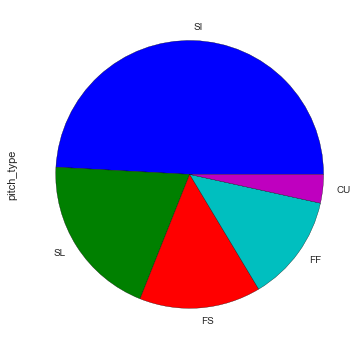

In [2]:
import pandas as pd
from matplotlib import pyplot
import seaborn

# CSVを読み込み(2015/8/12のデータより)
pitch = pd.read_csv('./data/mlbam_pitch_20150812.csv')

# 岩隈さんの投球データを抽出
iwakuma_pitch = pitch.query('pit_box_name=="Iwakuma"')

# 球種ごとの球数をカウント
iwakuma_pitch.pitch_type.value_counts()

# 球種はこのリンクを参照 http://pitchfx.texasleaguers.com/
"""
FA:Fastball
FF:4-seam Fastball
FT:2-seam Fastball
FC:Cut Fastball
FS:Split-finger Fastball
FO:Forkball
SI:Sinker
SL:Slider
CU:Curveball
KC:Knuckle Curve
EP:Ephuus
CH:Change-up
SC:Screwball
KN:Knuckleball
UN:Unknown
"""

# 円グラフにしてみる
iwakuma_pitch.pitch_type.value_counts().plot(kind='pie', figsize=(6, 6))

In [3]:
# 投球結果, 投球の詳細, 変化球, 初速, 終速, 精度(?)
# iwakuma_pitch[['pitch_res', 'pitch_des', 'pitch_type', 'start_speed', 'end_speed', 'type_confidence']]

# 球種, 打席位置(right or left), 高さ(pz), 幅(px)
iwakuma_pitch[['pitch_type', 'bat_hand_cd', 'pz', 'px']]

,pitch_type,bat_hand_cd,pz,px
703,SI,R,1.928,-0.131
704,SI,R,1.334,0.824
705,SL,R,2.566,0.868
706,FF,L,1.022,-0.720
707,SL,L,2.377,-1.190
708,SI,L,3.375,-0.730
709,SL,L,1.603,-0.013
710,FF,R,3.319,0.353
711,SI,R,2.258,-1.162
712,FS,R,2.509,-0.548


In [4]:
# 初速と終速の統計情報
iwakuma_pitch[['start_speed', 'end_speed']].describe()

,start_speed,end_speed
count,116.000000,116.000000
mean,86.137931,78.641379
std,4.164418,3.491183
min,71.100000,64.600000
25%,84.100000,77.000000
50%,85.750000,78.750000
75%,89.725000,81.200000
max,92.400000,84.300000


In [5]:
# 球種ごとのカウント
iwakuma_pitch.pitch_type.value_counts()


SI    57
SL    23
FS    17
FF    15
CU     4
Name: pitch_type, dtype: int64